### Implementing a spam filter using sklearn

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

In [52]:
#Dataset : https://archive.ics.uci.edu/ml/datasets/Spambase
data = pd.read_csv('../spambase.data').as_matrix()


In [43]:
np.random.shuffle(data) #To shuffle the data everytime the train and test is performed
X = data[:, :48]
Y = data[:, -1]
Xtrain = X[:-500,]  #first 500 rows
Ytrain = Y[:-500,]
Xtest = X[-150:,]  #last 150 rows
Ytest = Y[-150:,]

In [44]:
#Using the Naive Bayes Classifier
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("Classification Score is {0}".format(model.score(Xtest,Ytest)))

Classification Score is 0.8866666666666667


In [45]:
#Using the AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(Xtrain,Ytrain)
print("Classification Score is {0}".format(model.score(Xtest,Ytest)))

Classification Score is 0.9133333333333333


### Building a spam classified on  https://www.kaggle.com/uciml/sms-spam-collection-dataset/

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('../spam.csv',encoding='ISO-8859-1')
#Drop irrelevant columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
#Rename data columns
df.columns = ['labels','data']

In [58]:
#assign 0 and 1 for non spam and spam labels
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].as_matrix()


In [59]:
#Use any of the following methods
tfidfvectorizer = TfidfVectorizer(decode_error='ignore')
X = tfidfvectorizer.fit_transform(df['data'])

In [61]:
countvectoriser = CountVectorizer(decode_error='ignore')
X = countvectoriser.fit_transform(df['data'])

In [88]:
Xtrain , Xtest, Ytrain , Ytest = train_test_split(X,Y,test_size=0.33)

In [89]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("Classification Score on train {0}".format(model.score(Xtrain,Ytrain)))
print("Classification Score on test  {0}".format(model.score(Xtest,Ytest)))

Classification Score on train 0.9646396999732119
Classification Score on test  0.9505165851005981


In [90]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(Xtrain,Ytrain)
print("Classification Score on train {0}".format(model.score(Xtrain,Ytrain)))
print("Classification Score on test  {0}".format(model.score(Xtest,Ytest)))

Classification Score on train 0.984195017412269
Classification Score on test  0.9700924415443176


In [103]:
#To build a wordcloud out of most occuring words in spam and non spam
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def visualize(label):
    words = ''
    for msg in df[df['labels']==label]['data']:
        msg = msg.lower()
        words = words + ' ' + msg
    #print(words)
    wordcloud = WordCloud().generate(words)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
        

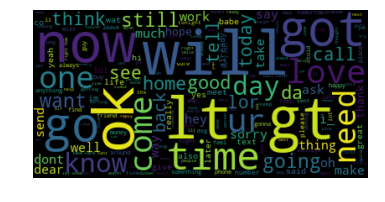

In [85]:
visualize('ham')


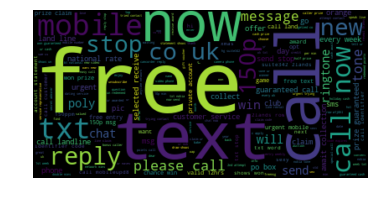

In [102]:
visualize('spam')

In [91]:
df['predictions'] = model.predict(X)

#### To check for misclassifications

In [96]:
#Messages that weren't spam but got classified as spam
misclassified = df[(df['predictions']==0) & (df['b_labels'] ==1 )]['data']

In [98]:
#Messages that were spam but got classified as not spam
not_actually_spam = df[(df['predictions']==1) & (df['b_labels'] ==0 )]['data']